In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


amazon_sales= 'Amazon Sale Report.csv' 

sales=pd.read_csv(amazon_sales)
#sales = sales.drop(columns=['Unnamed: 22'])
    
#Drop both 'fulfilled-by' and 'Unnamed: 22' 
sales = sales.drop(columns=['fulfilled-by', 'Unnamed: 22'])


# Function to display initial data overview
def data_overview(df, name):
    print(f"\nOverview of {name} dataset:")
    print(df.info())
    print(df.head())
    print(f"\nNumber of duplicates in {name}: {df.duplicated().sum()}")
    print(f"Missing values in {name}:\n{df.isnull().sum()}\n")
    
    
# # Calculate the percentage of missing values
# # Round the percentages to two decimal places
# missing_percentages = sales.isnull().sum() / len(sales) *100
# missing_percentages = missing_percentages.round(2)
# print('Raw data missing values percentages')
# for column, percentage in missing_percentages.items():
#     if percentage > 0:
#         print(f"{column}: {percentage}%")
    
# Replace missing values in 'Courier Status' with 'Unknown' since 5.33% are null
sales['Courier Status'].fillna('Unknown', inplace=True)

# Replace missing values in 'currency' with 'INR' since 6.04% are null & all non-null are INR
sales['currency'].fillna('INR', inplace=True)

# Calculate the mean and median of the 'Amount' column 
amount_mean = sales['Amount'].mean()
amount_median = sales['Amount'].median()
# Replace missing values in 'Amount' with the mean since 6.04% are null
sales['Amount'].fillna(amount_mean, inplace=True)

# Replace missing values with 'Unknown'
columns_to_fill = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

for column in columns_to_fill:
    sales[column].fillna('Unknown', inplace=True)


# Replace NaN values in 'promotion-ids' with 'None'
sales['promotion-ids'] = sales['promotion-ids'].fillna('None')



# # Drop both 'fulfilled-by' and 'Unnamed: 22' 
# sales = sales.drop(columns=['fulfilled-by', 'Unnamed: 22'])
    
# missing_summary = sales.isnull().sum()
# print(missing_summary[missing_summary > 0])


    
    
    
# Display initial data overviews
data_overview(sales, "sales")



/Users/juanescobar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



Overview of sales dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  Amount

In [2]:
# Replace missing values in 'Courier Status' with 'Unknown' since 5.33% are null
sales['Courier Status'].fillna('Unknown', inplace=True)

# Replace missing values in 'currency' with 'INR' since 6.04% are null & all non-null are INR
sales['currency'].fillna('INR', inplace=True)

# Calculate the mean and median of the 'Amount' column 
amount_mean = sales['Amount'].mean()
amount_median = sales['Amount'].median()
# Replace missing values in 'Amount' with the mean since 6.04% are null
sales['Amount'].fillna(amount_mean, inplace=True)

# Replace missing values with 'Unknown'
columns_to_fill = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

for column in columns_to_fill:
    sales[column].fillna('Unknown', inplace=True)

# # Replace missing values with 'None'
# sales['promotion-ids'] = sales['promotion-ids'].fillna(value=None)

# # Drop both 'fulfilled-by' and 'Unnamed: 22' 
# sales = sales.drop(columns=['fulfilled-by', 'Unnamed: 22'])
    
# missing_summary = sales.isnull().sum()
# print(missing_summary[missing_summary > 0])




In [3]:
# Check the data types of all columns
print(sales.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code       object
ship-country           object
promotion-ids          object
B2B                      bool
dtype: object


In [4]:
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales['Fulfilment'] = sales['Fulfilment'].astype('category')
sales.columns = sales.columns.str.strip()

# List of columns to convert to 'category' type
columns_to_convert = ['Fulfilment', 'Sales Channel', 'ship-service-level']

# Convert the columns to 'category' type
sales[columns_to_convert] = sales[columns_to_convert].astype('category')


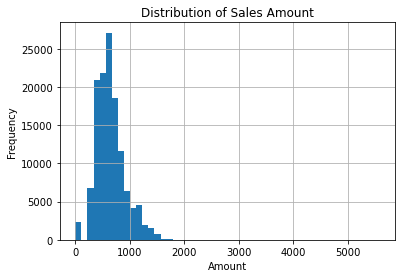

In [5]:
#Begin EDA
sales['Amount'].hist(bins=50)
plt.title('Distribution of Sales Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [6]:
print(sales['Amount'])

0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128970     517.00
128971     999.00
128972     690.00
128973    1199.00
128974     696.00
Name: Amount, Length: 128975, dtype: float64


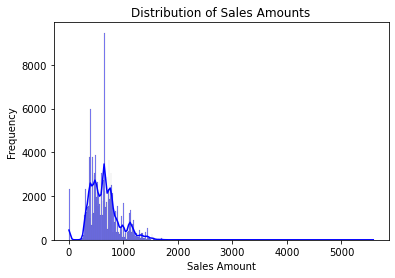

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(sales['Amount'], kde=True, color='blue')
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


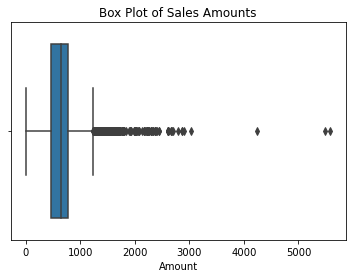

In [8]:
sns.boxplot(x=sales['Amount'])
plt.title('Box Plot of Sales Amounts')
plt.show()

In [9]:
from scipy.stats import zscore

sales['z_score'] = zscore(sales['Amount'])
outliers = sales[sales['z_score'].abs() > 3]

print(outliers)

         index             Order ID       Date                        Status  \
265        265  171-6655820-6440356 2022-04-30                       Shipped   
324        324  407-5096970-7475550 2022-04-30                     Cancelled   
349        349  171-3537751-4007556 2022-04-30                       Shipped   
416        416  404-0532727-2082745 2022-04-30                       Shipped   
647        647  171-6153595-4758722 2022-04-30                       Shipped   
...        ...                  ...        ...                           ...   
128343  128343  408-5263567-9377141 2022-06-01                       Shipped   
128402  128402  404-3991066-5251531 2022-06-01  Shipped - Delivered to Buyer   
128463  128463  406-7978809-1330707 2022-06-01                       Shipped   
128665  128665  407-6276213-8167515 2022-06-01  Shipped - Delivered to Buyer   
128873  128873  405-4724097-1016369 2022-06-01  Shipped - Delivered to Buyer   

       Fulfilment Sales Channel ship-se

In [10]:
# Display rows with outliers
print(outliers.head())


     index             Order ID       Date     Status Fulfilment  \
265    265  171-6655820-6440356 2022-04-30    Shipped     Amazon   
324    324  407-5096970-7475550 2022-04-30  Cancelled   Merchant   
349    349  171-3537751-4007556 2022-04-30    Shipped     Amazon   
416    416  404-0532727-2082745 2022-04-30    Shipped     Amazon   
647    647  171-6153595-4758722 2022-04-30    Shipped     Amazon   

    Sales Channel ship-service-level   Style                SKU Category  ...  \
265     Amazon.in          Expedited   J0008      J0008-SKD-XXL      Set  ...   
324     Amazon.in           Standard   J0010        J0010-LCD-L      Set  ...   
349     Amazon.in          Expedited  SET436  SET436-KR-NP-XXXL      Set  ...   
416     Amazon.in          Expedited   J0225      J0225-SKD-XXL      Set  ...   
647     Amazon.in          Expedited   J0230        J0230-SKD-S      Set  ...   

    Qty currency   Amount    ship-city      ship-state  ship-postal-code  \
265   2      INR  2130.00   

count     946.000000
mean     1619.024186
std       292.963549
min      1468.580000
25%      1523.000000
50%      1523.000000
75%      1613.000000
max      5584.000000
Name: Amount, dtype: float64


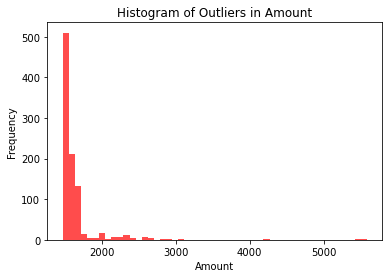

In [11]:
print(outliers['Amount'].describe())
plt.hist(outliers['Amount'], bins=50, color='red', alpha=0.7)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Outliers in Amount')
plt.show()

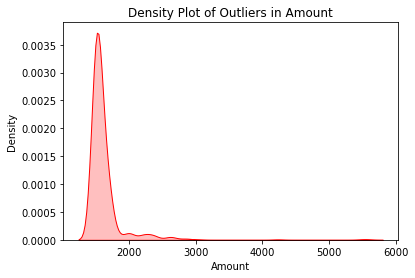

In [12]:
sns.kdeplot(outliers['Amount'], shade=True, color='red')
plt.xlabel('Amount')
plt.title('Density Plot of Outliers in Amount')
plt.show()

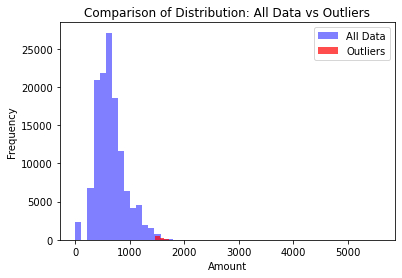

In [13]:
# Plot histogram of entire data
plt.hist(sales['Amount'], bins=50, color='blue', alpha=0.5, label='All Data')

# Plot histogram of outliers
plt.hist(outliers['Amount'], bins=50, color='red', alpha=0.7, label='Outliers')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Comparison of Distribution: All Data vs Outliers')
plt.legend()
plt.show()

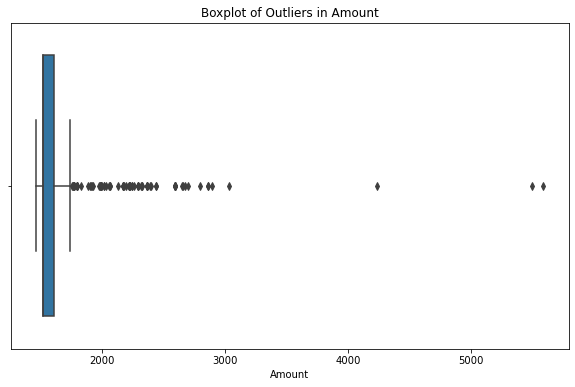

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=outliers['Amount'])
plt.title('Boxplot of Outliers in Amount')
plt.xlabel('Amount')
plt.show()


In [15]:
946/129000


0.007333333333333333

In [16]:
# Count the number of non-null values in the 'Amount' column
num_values = sales['Amount'].count()

print(f"Number of values in 'Amount' column: {num_values}")



outlier_percentage=len(outliers)/num_values

print(outlier_percentage)

Number of values in 'Amount' column: 128975
0.007334754797441364


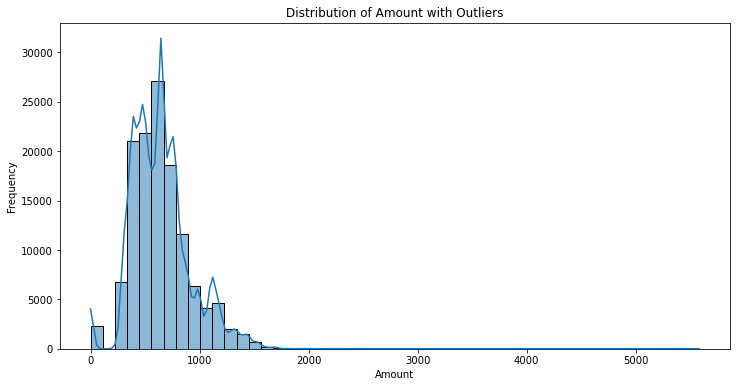

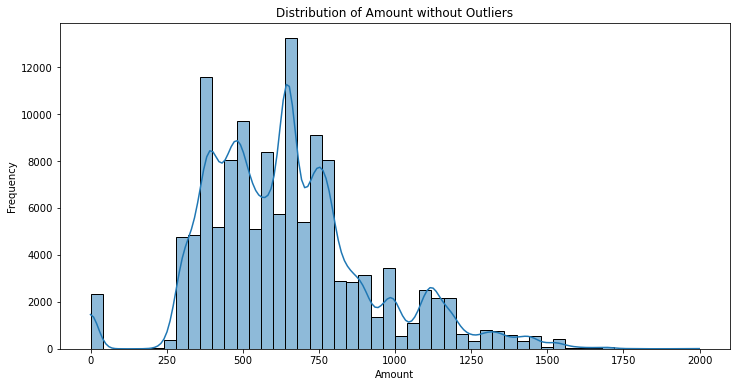

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution with outliers
plt.figure(figsize=(12, 6))
sns.histplot(sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount with Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Assuming outliers are those greater than 3000 (example threshold)
filtered_sales = sales[sales['Amount'] <= 2000]


# Plot distribution without outliers
plt.figure(figsize=(12, 6))
sns.histplot(filtered_sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount without Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [18]:
print(filtered_sales.describe)

<bound method NDFrame.describe of          index             Order ID       Date                        Status  \
0            0  405-8078784-5731545 2022-04-30                     Cancelled   
1            1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146 2022-04-30                       Shipped   
3            3  403-9615377-8133951 2022-04-30                     Cancelled   
4            4  407-1069790-7240320 2022-04-30                       Shipped   
...        ...                  ...        ...                           ...   
128970  128970  406-6001380-7673107 2022-05-31                       Shipped   
128971  128971  402-9551604-7544318 2022-05-31                       Shipped   
128972  128972  407-9547469-3152358 2022-05-31                       Shipped   
128973  128973  402-6184140-0545956 2022-05-31                       Shipped   
128974  128974  408-7436540-8728312 2022-05-31                       Shipped   

     

In [19]:
outlier_sales = sales[sales['Amount'] >= 2500]
print(outlier_sales)

         index             Order ID       Date                        Status  \
11160    11160  403-4106553-1691525 2022-04-23  Shipped - Delivered to Buyer   
24494    24494  407-3483041-9133135 2022-04-16                     Cancelled   
28814    28814  408-9885439-6698733 2022-04-13                       Shipped   
39944    39944  408-3363121-6123562 2022-04-06  Shipped - Delivered to Buyer   
42039    42039  402-5239558-4281957 2022-04-05                       Shipped   
54605    54605  171-9419863-7830701 2022-05-27                       Shipped   
56307    56307  405-5657207-4685151 2022-05-26  Shipped - Delivered to Buyer   
63974    63974  408-9361250-7029128 2022-05-19                       Shipped   
67764    67764  402-0603541-4663511 2022-05-16  Shipped - Delivered to Buyer   
69527    69527  406-0207843-8044301 2022-05-15  Shipped - Delivered to Buyer   
75760    75760  402-9141667-1791537 2022-05-10                     Cancelled   
79899    79899  405-6877720-7865168 2022

                      SKU       Category  Qty currency   Amount
11160      J0013-SKD-XXXL            Set    5      INR  5495.00
24494    SET397-KR-NP  -M            Set    0      INR  4235.72
28814         J0285-SKD-S            Set    2      INR  2864.00
39944       JNE3797-KR-XS  Western Dress    4      INR  2860.00
42039     SET268-KR-NP-XS            Set    8      INR  5584.00
54605        J0341-DR-XXL  Western Dress    3      INR  2655.00
56307         J0238-LCD-L            Set    1      INR  2598.00
63974        J0230-SKD-XL            Set    2      INR  2698.00
67764        J0238-LCD-XL            Set    1      INR  2598.00
69527         J0238-LCD-L            Set    1      INR  2598.00
75760    SET364-KR-NP-XXL            Set    2      INR  2676.00
79899    JNE2086-KR-389-M          kurta    4      INR  2796.00
89150      SET197-KR-NP-M            Set    4      INR  3036.00
112946       J0238-LCD-XL            Set    1      INR  2598.00
114176       J0238-LCD-XL            Set

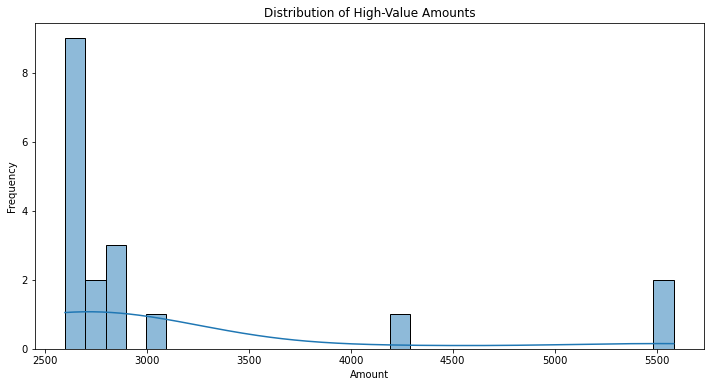

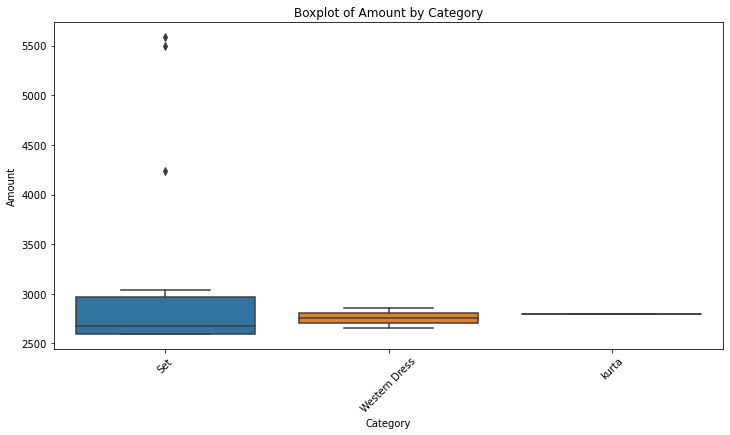

Average Amount per Category:
 Category
Set              3182.314667
Western Dress    2757.500000
kurta            2796.000000
Name: Amount, dtype: float64
 Median Amount per Category:
 Category
Set              2676.0
Western Dress    2757.5
kurta            2796.0
Name: Amount, dtype: float64
Average Amount per SKU:
 SKU
J0013-SKD-XXXL       5495.00
J0230-SKD-XL         2698.00
J0238-LCD-L          2598.00
J0238-LCD-S          2598.00
J0238-LCD-XL         2598.00
J0285-SKD-S          2864.00
J0341-DR-XXL         2655.00
JNE2086-KR-389-M     2796.00
JNE3797-KR-XS        2860.00
SET197-KR-NP-M       3036.00
SET268-KR-NP-XS      5584.00
SET278-KR-NP-XXXL    2894.00
SET364-KR-NP-XXL     2676.00
SET374-KR-NP-XXL     2664.00
SET397-KR-NP  -M     4235.72
Name: Amount, dtype: float64
Median Amount per SKU:
 SKU
J0013-SKD-XXXL       5495.00
J0230-SKD-XL         2698.00
J0238-LCD-L          2598.00
J0238-LCD-S          2598.00
J0238-LCD-XL         2598.00
J0285-SKD-S          2864.00
J0341-DR-X

In [20]:
# Define the amount threshold for outliers
threshold = 2500

# Filter rows with 'Amount' above the threshold
outlier_rows = sales[sales['Amount'] > threshold]

# Display the rows
print(outlier_rows[['SKU', 'Category', 'Qty', 'currency', 'Amount']])

# Summary statistics for high-value rows
summary_stats = outlier_rows[['Amount', 'Qty']].describe()
print(summary_stats)

# Check for unique categories or SKUs
unique_categories = outlier_rows['Category'].unique()
unique_skus = outlier_rows['SKU'].unique()
print("Unique Categories:", unique_categories)
print("Unique SKUs:", unique_skus)


import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Amount for outliers
plt.figure(figsize=(12, 6))
sns.histplot(outlier_rows['Amount'], kde=True, bins=30)
plt.title('Distribution of High-Value Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Amount by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=outlier_rows)
plt.title('Boxplot of Amount by Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

# Check average amount per category
average_amount_per_category = outlier_rows.groupby('Category')['Amount'].mean()
print("Average Amount per Category:\n", average_amount_per_category)

median_amount_per_category = outlier_rows.groupby('Category')['Amount'].median()
print(" Median Amount per Category:\n", median_amount_per_category)

# Check average amount per SKU
average_amount_per_sku = outlier_rows.groupby('SKU')['Amount'].mean()
print("Average Amount per SKU:\n", average_amount_per_sku)


median_amount_per_sku = outlier_rows.groupby('SKU')['Amount'].median()
print("Median Amount per SKU:\n", median_amount_per_sku)





In [21]:
# Find unique SKUs in the outliers
unique_skus = outlier_rows['SKU'].unique()

# Count the number of unique SKUs
unique_sku_count = len(unique_skus)

print(f"Number of unique SKUs among outliers: {unique_sku_count}")

Number of unique SKUs among outliers: 15


In [22]:
# Get descriptive statistics for the 'Qty' column
quantity_stats = sales['Qty'].describe()
print(quantity_stats)


count    128975.000000
mean          0.904431
std           0.313354
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          15.000000
Name: Qty, dtype: float64


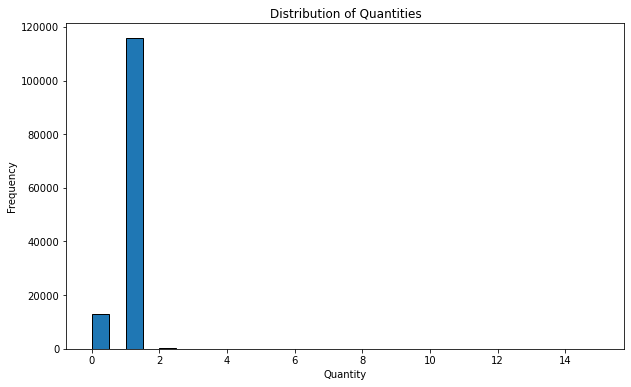

In [23]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Qty' column
plt.figure(figsize=(10, 6))
plt.hist(sales['Qty'], bins=30, edgecolor='black')
plt.title('Distribution of Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


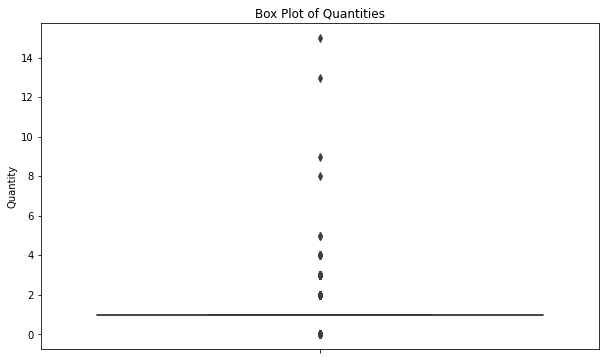

In [24]:
import seaborn as sns

# Plot a box plot of the 'Qty' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=sales['Qty'])
plt.title('Box Plot of Quantities')
plt.ylabel('Quantity')
plt.show()

In [25]:
# Get the count of each unique SKU
sku_counts = sales['SKU'].value_counts()
print(sku_counts)


JNE3797-KR-L       773
JNE3797-KR-M       657
JNE3797-KR-S       587
JNE3405-KR-L       535
J0230-SKD-M        507
                  ... 
BTM004-XXXL          1
BL090-XS             1
BTM045-PP-M          1
SET034-KR-NP-XS      1
SET045-KR-NP-M       1
Name: SKU, Length: 7195, dtype: int64


In [33]:
# Display the top 10 most common SKUs
top_skus = sku_counts.head(15)
print(top_skus)


JNE3797-KR-L       773
JNE3797-KR-M       657
JNE3797-KR-S       587
JNE3405-KR-L       535
J0230-SKD-M        507
JNE3797-KR-XL      474
J0230-SKD-S        452
JNE3405-KR-S       443
JNE3797-KR-XS      431
JNE3797-KR-XXL     395
JNE3405-KR-M       394
SET268-KR-NP-S     387
JNE3797-KR-XXXL    386
SET268-KR-NP-XL    386
SET268-KR-NP-L     362
Name: SKU, dtype: int64


In [34]:
# Get the top 10 most common SKUs
top_skus = sales['SKU'].value_counts().head(15).index

# Filter the dataset for the top 10 SKUs
top_skus_prices = sales[sales['SKU'].isin(top_skus)][['SKU', 'Amount']]

# Display the top SKUs and their corresponding prices
print(top_skus_prices)



                    SKU   Amount
7          JNE3405-KR-S   399.00
39         JNE3405-KR-L   399.00
44       SET268-KR-NP-L   788.00
49         JNE3405-KR-M   399.00
57         JNE3405-KR-L   399.00
...                 ...      ...
128809    JNE3797-KR-XL   735.00
128835   JNE3797-KR-XXL   771.00
128866  JNE3797-KR-XXXL   771.00
128875    JNE3797-KR-XL   734.29
128957      J0230-SKD-M  1349.00

[7169 rows x 2 columns]


In [28]:
# Filter the dataset for the SKU 'J0238-LCD-L'
sku_price_info = sales[sales['SKU'] == 'J0238-LCD-L']
# Display the price information for this SKU
print(sku_price_info[['SKU', 'Amount']])


               SKU       Amount
39842  J0238-LCD-L  1671.000000
56307  J0238-LCD-L  2598.000000
69527  J0238-LCD-L  2598.000000
73378  J0238-LCD-L   648.561465
77634  J0238-LCD-L  2442.000000


In [29]:
import matplotlib.pyplot as plt

# Get the counts of each SKU
sku_counts = sales['SKU'].value_counts()

# Filter for the top 15 SKUs if necessary
#top_15_skus = sku_counts.head(15)

# Plot the distribution
plt.figure(figsize=(12, 8))
top_15_skus.plot(kind='bar', color='skyblue')
plt.title('Distribution of Unique SKUs')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate SKU labels for better readability
plt.show()

NameError: name 'top_15_skus' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each SKU
sku_counts = sales['SKU'].value_counts()

# Filter for the top 15 SKUs if necessary
top_15_skus = sku_counts.head(15).reset_index()
top_15_skus.columns = ['SKU', 'Count']

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='SKU', y='Count', data=top_15_skus, palette='viridis')
plt.title('Distribution of Top 15 SKUs')
plt.xlabel('SKU')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate SKU labels for better readability
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each SKU and select the top 15 SKUs
sku_counts = sales['SKU'].value_counts()


# Filter the dataset to include only the top 15 SKUs
filtered_sales = sales[sales['SKU'].isin(sku_counts)]

# Plot the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='SKU', y='Amount', data=filtered_sales, palette='viridis')
plt.title('Price Distribution for SKUs')
plt.xlabel('SKU')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate SKU labels for better readability
plt.show()

In [35]:
# Sort the sales data by the Amount column in descending order
sorted_sales = sales.sort_values(by='Amount', ascending=False)

# Select the top sales with the highest amounts
top_sales = sorted_sales[['Amount', 'SKU', 'Qty']]

# Display the top sales
print(top_sales.head())


         Amount                SKU  Qty
42039   5584.00    SET268-KR-NP-XS    8
11160   5495.00     J0013-SKD-XXXL    5
24494   4235.72   SET397-KR-NP  -M    0
89150   3036.00     SET197-KR-NP-M    4
121225  2894.00  SET278-KR-NP-XXXL    2


In [36]:
# Filter data for the specific SKU
sku_data = sales[sales['SKU'] == 'SET268-KR-NP-XS']

# Display the data for this SKU
print(sku_data.head())

# Analyze total sales and quantities
total_sales = sku_data['Amount'].sum()
total_qty = sku_data['Qty'].sum()

print(f"Total Sales for {sku_data['SKU'].iloc[0]}: {total_sales}")
print(f"Total Quantity Sold for {sku_data['SKU'].iloc[0]}: {total_qty}")

      index             Order ID       Date   Status Fulfilment Sales Channel  \
298     298  171-6845071-0336346 2022-04-30  Shipped     Amazon     Amazon.in   
885     885  403-4522038-5418732 2022-04-30  Shipped     Amazon     Amazon.in   
1523   1523  405-1000228-4666743 2022-04-29  Shipped     Amazon     Amazon.in   
1587   1587  171-4919127-5482722 2022-04-29  Shipped     Amazon     Amazon.in   
1951   1951  406-1415992-3059531 2022-04-29  Shipped     Amazon     Amazon.in   

     ship-service-level   Style              SKU Category  ... Qty currency  \
298           Expedited  SET268  SET268-KR-NP-XS      Set  ...   1      INR   
885           Expedited  SET268  SET268-KR-NP-XS      Set  ...   1      INR   
1523          Expedited  SET268  SET268-KR-NP-XS      Set  ...   1      INR   
1587          Expedited  SET268  SET268-KR-NP-XS      Set  ...   1      INR   
1951          Expedited  SET268  SET268-KR-NP-XS      Set  ...   1      INR   

     Amount  ship-city   ship-state  s

In [38]:
# Extract specific sales based on indices
specific_sales = sales.loc[[42039, 11160, 24494, 89150], ['Amount', 'SKU', 'Qty']]

# Display the details
print(specific_sales)

# Investigate further by looking at other columns related to these sales
detailed_sales = sales.loc[[42039, 11160, 24494, 89150]]
print(detailed_sales)

# Further analysis could include checking dates, fulfillment, etc.



        Amount               SKU  Qty
42039  5584.00   SET268-KR-NP-XS    8
11160  5495.00    J0013-SKD-XXXL    5
24494  4235.72  SET397-KR-NP  -M    0
89150  3036.00    SET197-KR-NP-M    4
       index             Order ID       Date                        Status  \
42039  42039  402-5239558-4281957 2022-04-05                       Shipped   
11160  11160  403-4106553-1691525 2022-04-23  Shipped - Delivered to Buyer   
24494  24494  407-3483041-9133135 2022-04-16                     Cancelled   
89150  89150  406-7195963-2374765 2022-05-02                       Shipped   

      Fulfilment Sales Channel ship-service-level   Style               SKU  \
42039     Amazon     Amazon.in          Expedited  SET268   SET268-KR-NP-XS   
11160   Merchant     Amazon.in           Standard   J0013    J0013-SKD-XXXL   
24494   Merchant     Amazon.in           Standard  SET397  SET397-KR-NP  -M   
89150     Amazon     Amazon.in          Expedited  SET197    SET197-KR-NP-M   

      Category  ... Qty